# 1) Prepare a model for glass classification using KNN
Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
glass_data = pd.read_csv(r'C:\Users\hindu\Downloads\glass.csv')

In [5]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
#shape of data
glass_data.shape

(214, 10)

In [7]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
#data types
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:

glass_data.duplicated().sum()

1

In [11]:
#duplicated row 
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
#dropping duplicated row
glass_data.drop_duplicates(inplace=True)

In [13]:

glass_data.duplicated().sum()

0

In [14]:
#after dropping duplicate
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
#shape
glass_data.shape

(213, 10)

In [16]:
#unique values in Output Variable
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [17]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [23]:
glass_data["Type"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Data Preparation

In [24]:
X= glass_data.drop('Type',axis=1)
y=glass_data[['Type']]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [26]:
X_train.shape,y_train.shape

((170, 9), (170, 1))

In [27]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

# Model Building || Model Training

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Testing

In [29]:
#prediction for training
pred_y= knn.predict(X_train)

In [30]:
#accuracy Score
accuracy_score(y_train,pred_y)

1.0

In [31]:
#counfusion Matrix
confusion_matrix(y_train,pred_y)

array([[47,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 26]], dtype=int64)

In [32]:
print(classification_report(y_train,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [33]:
#prediction for testing data
y_pred=knn.predict(X_test)

In [34]:
#accuracy score for test data
accuracy_score(y_test,y_pred)

0.6976744186046512

In [35]:
#confusion Matrix
confusion_matrix(y_test,y_pred)

array([[12,  6,  4,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.55      0.69        22
           2       0.59      1.00      0.74        10
           3       0.43      0.75      0.55         4
           5       0.50      1.00      0.67         1
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.70        43
   macro avg       0.74      0.77      0.69        43
weighted avg       0.80      0.70      0.69        43



# Visualizing the CV results

In [37]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

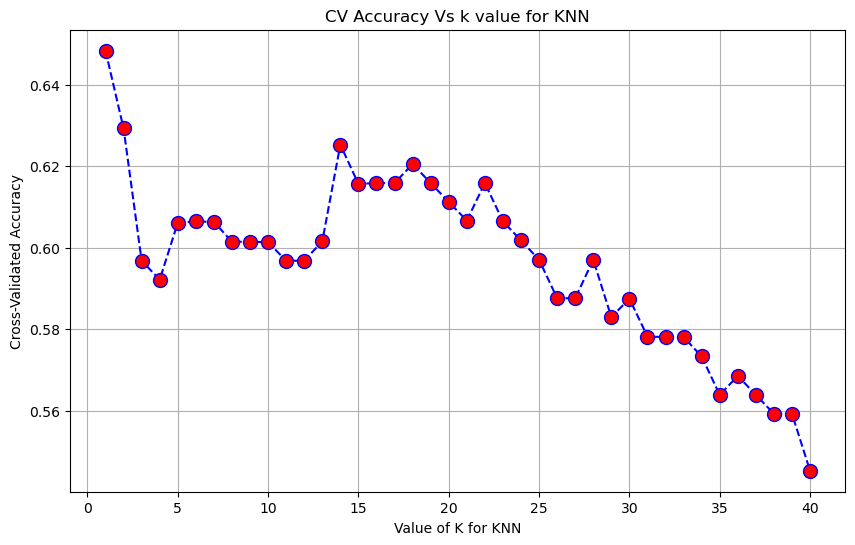

In [38]:
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# 2) Implement a KNN model to classify the animals in to categorie

In [41]:
zoo_data = pd.read_csv(r'C:\Users\hindu\Downloads\Zoo.csv')

In [42]:
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [43]:
#shape of data
zoo_data.shape

(101, 18)

In [44]:

zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [45]:
#data types
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [46]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [47]:
#checking for duplicates
zoo_data.duplicated().sum()

0

In [48]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [49]:
#unique values in Output variable
zoo_data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [51]:
zoo_data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# Data Preparation

In [52]:
#dropping unneccesory column
zoo_data.drop('animal name',axis=1,inplace=True)

In [53]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [54]:
zoo_data.shape

(101, 17)

# train-test split

In [55]:
X=zoo_data.drop('type',axis=1)
y=zoo_data[['type']]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [57]:
print('X_train_shape :',X_train.shape , '\ny_train_shape :',y_train.shape)
print('X_test_shape :',X_test.shape , '\ny_test_shape :',y_test.shape)

X_train_shape : (80, 16) 
y_train_shape : (80, 1)
X_test_shape : (21, 16) 
y_test_shape : (21, 1)


# Model Building || Model Training

In [58]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Testing

In [59]:
#prediction for training
pred_y= model.predict(X_train)

In [60]:
#accuracy Score
accuracy_score(y_train,pred_y)

1.0

In [61]:
#counfusion Matrix
confusion_matrix(y_train,pred_y)

array([[34,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [62]:
print(classification_report(y_train,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [63]:
#prediction for testing data
y_pred=model.predict(X_test)

In [64]:
#accuracy score for test data
accuracy_score(y_test,y_pred)

0.9523809523809523

In [65]:
#confusion Matrix
confusion_matrix(y_test,y_pred)

array([[7, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 0, 2]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.93      0.95      0.92        21
weighted avg       0.98      0.95      0.96        21



# Visualizing the CV results

In [67]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

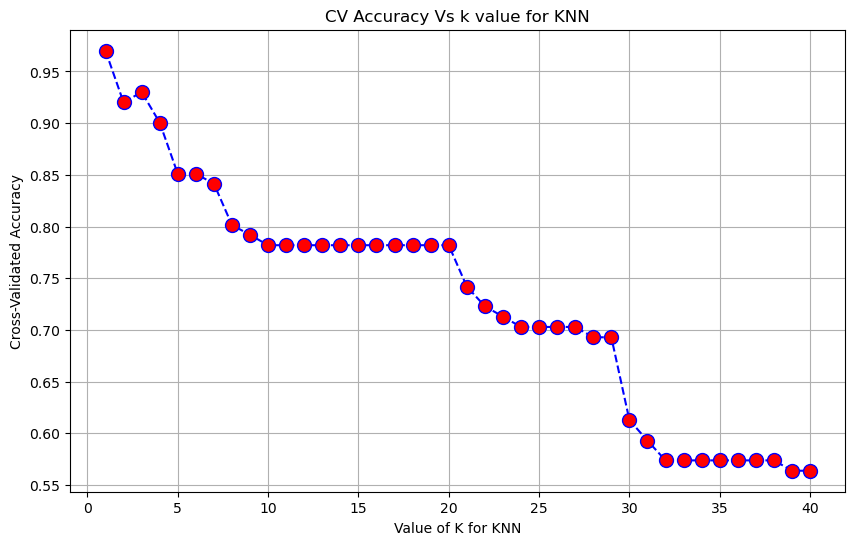

In [68]:
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()